In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv('diabetes.csv')
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [4]:
# remove the Outlier of skin thickness

max_skinthickness = data.SkinThickness.max()
data = data[data.SkinThickness!=max_skinthickness]

In [5]:
# create a helper function
def replace_zero(df, field, target):
    mean_by_target = df.loc[df[field] != 0, [field, target]].groupby(target).mean()
    data.loc[(df[field] == 0)&(df[target] == 0), field] = mean_by_target.iloc[0][0]
    data.loc[(df[field] == 0)&(df[target] == 1), field] = mean_by_target.iloc[1][0]

    # run the function
for col in ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']:   
    replace_zero(data, col, 'Outcome')   

In [6]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,767.000000,767.000000,767.000000,767.000000,767.000000,767.000000,767.000000,767.000000,767.000000
mean,3.847458,121.598641,72.431749,29.113796,156.938543,32.443489,0.471742,33.203390,0.348110
std,3.371117,30.359689,12.113731,8.547994,88.900636,6.882979,0.331524,11.721879,0.476682
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.500000,64.000000,25.000000,121.000000,27.500000,0.243500,24.000000,0.000000
50%,3.000000,117.000000,72.000000,28.000000,130.287879,32.000000,0.371000,29.000000,0.000000
75%,6.000000,141.000000,80.000000,32.631285,206.846154,36.600000,0.626500,41.000000,1.000000
max,17.000000,199.000000,122.000000,63.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [7]:
X = data.iloc[:,:-1]
y = data.iloc[:, -1]

In [8]:
X.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age'],
      dtype='object')

In [9]:
type(y)

pandas.core.series.Series

In [10]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=100)
print(X_train.shape)
print(X_test.shape)
print(y_train.size)
print(y_test.size)

(536, 8)
(231, 8)
536
231


In [11]:
X_train

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
155,7,152.000000,88.000000,44.000000,206.846154,50.000000,0.337,36
150,1,136.000000,74.000000,50.000000,204.000000,37.400000,0.399,24
78,0,131.000000,75.342629,32.631285,206.846154,43.200000,0.270,26
9,8,125.000000,96.000000,32.631285,206.846154,35.409434,0.232,54
142,2,108.000000,52.000000,26.000000,63.000000,32.500000,0.318,22
321,3,112.000000,74.000000,30.000000,206.846154,31.600000,0.197,25
450,1,82.000000,64.000000,13.000000,95.000000,21.200000,0.415,23
75,1,110.643863,48.000000,20.000000,130.287879,24.700000,0.140,22
29,5,117.000000,92.000000,27.235457,130.287879,34.100000,0.337,38
169,3,111.000000,90.000000,12.000000,78.000000,28.400000,0.495,29


In [12]:
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.neighbors  import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neural_network import MLPClassifier

from sklearn.metrics import f1_score

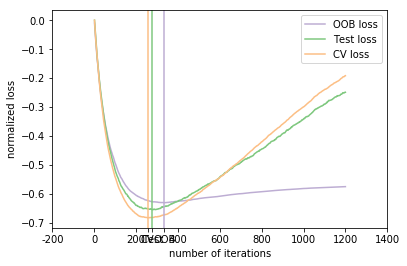

In [13]:
from sklearn.metrics import roc_curve
from sklearn.model_selection import KFold
params = {'n_estimators':1200, 'max_depth':9, 'subsample':0.5, 'learning_rate':0.01, 'min_samples_leaf':1, 'random_state':0}
gbc = GradientBoostingClassifier(**params)

n_estimators = 10
clf = gbc

# split training set into training and testing set
X_train_cv, X_test_cv, y_train_cv, y_test_cv = train_test_split(X_train, y_train, test_size = 0.3, random_state=100)

X_train_cv = X_train_cv.reset_index(drop=True, inplace=False)
y_train_cv = y_train_cv.reset_index(drop=True, inplace=False)


clf.fit(X_train_cv,y_train_cv)
#score = f1_score(y_train, clf.predict(X_train), pos_label = 1)
acc = clf.score(X_test_cv, y_test_cv)
    
n_estimators = params['n_estimators']
x = np.arange(n_estimators) + 1

""" The following part code was stole from sklearn """
def heldout_score(clf, X_test_cv, y_test_cv):
    """compute deviance scores on ``X_test`` and ``y_test``. """
    score = np.zeros((n_estimators,), dtype=np.float64)
    for i, y_pred in enumerate(clf.staged_decision_function(X_test_cv)):
        score[i] = clf.loss_(y_test_cv, y_pred)
    return score


def cv_estimate(n_splits=10):
    cv = KFold(n_splits=n_splits)
    cv_clf = clf
    val_scores = np.zeros((n_estimators,), dtype=np.float64)
    for train, test in cv.split(X_train_cv):
        cv_clf.fit(X_train_cv.iloc[train], y_train_cv[train])
        val_scores += heldout_score(cv_clf, X_train_cv.iloc[test], y_train_cv[test])
    val_scores /= n_splits
    return val_scores


# Estimate best n_estimator using cross-validation
cv_score = cv_estimate(3)

# Compute best n_estimator for test data
test_score = heldout_score(clf, X_test_cv, y_test_cv)

# negative cumulative sum of oob improvements
cumsum = -np.cumsum(clf.oob_improvement_)

# min loss according to OOB
oob_best_iter = x[np.argmin(cumsum)]

# min loss according to test (normalize such that first loss is 0)
test_score -= test_score[0]
test_best_iter = x[np.argmin(test_score)]

# min loss according to cv (normalize such that first loss is 0)
cv_score -= cv_score[0]
cv_best_iter = x[np.argmin(cv_score)]
    
# color brew for the three curves
oob_color = list(map(lambda x: x / 256.0, (190, 174, 212)))
test_color = list(map(lambda x: x / 256.0, (127, 201, 127)))
cv_color = list(map(lambda x: x / 256.0, (253, 192, 134)))

# plot curves and vertical lines for best iterations
plt.plot(x, cumsum, label='OOB loss', color=oob_color)
plt.plot(x, test_score, label='Test loss', color=test_color)
plt.plot(x, cv_score, label='CV loss', color=cv_color)
plt.axvline(x=oob_best_iter, color=oob_color)
plt.axvline(x=test_best_iter, color=test_color)
plt.axvline(x=cv_best_iter, color=cv_color)

# add three vertical lines to xticks
xticks = plt.xticks()
xticks_pos = np.array(xticks[0].tolist() +
                        [oob_best_iter, cv_best_iter, test_best_iter])
xticks_label = np.array(list(map(lambda t: int(t), xticks[0])) +
                        ['OOB', 'CV', 'Test'])
ind = np.argsort(xticks_pos)
xticks_pos = xticks_pos[ind]
xticks_label = xticks_label[ind]
plt.xticks(xticks_pos, xticks_label)

plt.legend(loc='upper right')
plt.ylabel('normalized loss')
plt.xlabel('number of iterations')

plt.show()

In [14]:
# helper functions
def train_clf(clf, X_train, y_train):
    
    return clf.fit(X_train, y_train)
    
def pred_clf(clf, features, target):
    
    y_pred = clf.predict(features)
    return f1_score(target.values, y_pred, pos_label = 1)

def train_predict(clf, X_train, y_train, X_test, y_test):
    
    train_clf(clf, X_train, y_train)
    
    print("F1 score for training set is: {:.4f}".format(pred_clf(clf, X_train, y_train)))
    print("F1 score for testing set is: {:.4f}\n".format(pred_clf(clf, X_test, y_test)))

In [16]:
from sklearn.metrics import accuracy_score

params = {'max_depth':9, 'subsample':0.5, 'learning_rate':0.01, 'min_samples_leaf':1, 'random_state':0}
gbc = GradientBoostingClassifier(n_estimators=290, **params)
# clf_ = gbc.fit(X_train, y_train)
# y_pred = clf_.predict(X_test)
# print('Accuracy is {}'.format(accuracy_score(y_test,y_pred )))
train_predict(gbc, X_train, y_train, X_test, y_test)

F1 score for training set is: 1.0000
F1 score for testing set is: 0.7974



In [ ]:
clf_

In [17]:
from sklearn.metrics import confusion_matrix

In [23]:
prediction_final = gbc.predict(X_train)

In [25]:
print(f1_score_matrix(y_train,prediction_final))

[[349   0]
 [  0 187]]


In [ ]:
gbc

In [ ]:
X.columns

In [ ]:
a = [1,212,2132,12,1323]

In [ ]:
sum(a)

In [ ]:
a = sorted(a)

In [ ]:
a

In [ ]:
memo = {}

for i in a:
    if i in memo:
        memo[i] += 1
    else:
        memo[i] = 1

In [ ]:
memo

In [ ]:
max(memo.values())

In [ ]:
a = [1,2,32,12,1,1,3,2,2,2,2,2,4,4,4,45,5,5,3,3,3,3,3,3,3,2,2,1,1,1,1,1]

In [ ]:
max(set(a), key=a.count)

In [ ]:
sum(a)/len(a)


In [ ]:
def median_calc(numbers):
    numbers.sort()
    if len(numbers)%2 == 0:
        mid = int(len(numbers)/2)
        print(int((numbers[mid] + numbers[mid-1])/2))
    else:
        mid = len(numbers)/2
        print(numbers[mid - 0.5])

In [ ]:
median_calc(a)

In [ ]:
3.0-1

In [ ]:
a = '64630 11735 14216 99233 14470 4978 73429 38120 51135 67060'.split(' ')

In [ ]:
a1= [int(x) for x in a]

In [ ]:
a1

In [ ]:
sorted(a1)

In [ ]:
print(min(set(a1), key=a1.count))

In [ ]:
a = [10,40, 30, 50, 20]

In [ ]:
mean  = sum(a)/len(a)

In [ ]:
a1 = [(x-mean)**2 for x in a]

In [ ]:
a1

In [ ]:
standar_deviation = (sum(a1)/len(a1))**(1/2)

In [ ]:
standar_deviation

In [ ]:
200**(1/2)

In [ ]:
A = np.random.randn(4,3)
B = np.sum(A, axis = 1, keepdims = True)

In [ ]:
B.shape

In [ ]:
parameters = {"W1": 'W1qWQ',
                  "b1": 'b1SASA',
                  "W2": 'W2SA',
                  "b2": 'b2AA'}

In [ ]:
parameters["W1"]

In [ ]:
from sklearn 